In [61]:
!pip install pandas

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
^C
ERROR: Operation cancelled by user


In [5]:
!pip install seaborn

In [6]:
!pip install matplotlib

In [7]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [9]:
# 3. 데이터 병합
# Identity_ID를 기준으로 데이터 병합
merged_data = (
    identities
    .merge(level_stats, left_on='ID', right_on='Identity_ID', how='left')
    .merge(uptie_stats, on='Identity_ID', how='left')
    .merge(resist_infos, on='Identity_ID', how='left')
    .merge(stagger_thresholds, on='Identity_ID', how='left')
    .merge(skills, on='Identity_ID', how='left')
    .merge(behaviors, on='Identity_ID', how='left')
)

merged_data
print(merged_data.info())

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json  # JSON 데이터를 처리하기 위한 모듈

# 1. 데이터 로드
identities = pd.read_csv('./csv/Identities.csv')
level_stats = pd.read_csv('./csv/Levelstats.csv')
uptie_stats = pd.read_csv('./csv/Uptiestats.csv')
resist_infos = pd.read_csv('./csv/ResistInfos.csv')
stagger_thresholds = pd.read_csv('./csv/StaggerThresholds.csv')
skills = pd.read_csv('./csv/IdentitiesSkills.csv')
behaviors = pd.read_csv('./csv/IdentitiesBehaviors.csv')
keywords = pd.read_csv('./csv/Keywords.csv')

# 2. 데이터 정제
# a. Uptiestats에서 Speed를 "MinSpeed-MaxSpeed" 형태에서 분리
uptie_stats[['MinSpeed', 'MaxSpeed']] = uptie_stats['Speed'].str.split('-', expand=True).astype(int)

# b. JSON 형식의 Effect_Data 컬럼 처리
# JSON 데이터를 개별 컬럼으로 분리 (필요한 경우)
#skills['Effect_Data'] = skills['Effect_Data'].apply(lambda x: json.loads(x) if pd.notnull(x) else {})
# 예: 주요 키를 추출하여 새 컬럼 생성
#skills['Effect_Description'] = skills['Effect_Data'].apply(lambda x: x.get('description', None))

# c. Release_Date를 날짜 형식으로 변환 후 월 단위로 변환
identities['Release_Date'] = pd.to_datetime(identities['Release_Date'], format='%Y-%m-%d')
identities['Release_Month'] = identities['Release_Date'].dt.to_period('M')

In [63]:
identities

,ID,Name,Rarity,Skill_1_Type,Skill_1_Sin_Affinity,Skill_2_Type,Skill_2_Sin_Affinity,Skill_3_Type,Skill_3_Sin_Affinity,Defense_Type,Defense_Sin_Affinity,Release_Date,Release_Month
0,10101,[LCB Sinner] Yi Sang,1,SLASH,Gloom,PENETRATE,Envy,SLASH,Sloth,GUARD,Gloom,2023-02-27,2023-02
1,10102,[Seven Assoc. South Section 6] Yi Sang,2,PENETRATE,Gloom,PENETRATE,Gluttony,HIT,Sloth,GUARD,Gluttony,2023-02-27,2023-02
2,10103,[Blade Lineage Salsu] Yi Sang,3,SLASH,Pride,SLASH,Wrath,SLASH,Envy,COUNTER,Pride,2023-02-27,2023-02
3,10104,[Effloresced E.G.O::Spicebush] Yi Sang,3,PENETRATE,Gluttony,HIT,Sloth,PENETRATE,Pride,EVADE,Sloth,2023-06-15,2023-06
4,10105,[Molar Office Fixer] Yi Sang,2,PENETRATE,Lust,HIT,Sloth,HIT,Wrath,GUARD,Sloth,2023-09-14,2023-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,11206,[Zwei Assoc. South Section 4] Gregor,3,SLASH,Sloth,SLASH,Gluttony,SLASH,Gloom,GUARD,Sloth,2023-08-10,2023-08
122,11207,[Twinhook Pirates First Mate] Gregor,3,PENETRATE,Sloth,PENETRATE,Pride,PENETRATE,Gloom,EVADE,Gloom,2023-11-16,2023-11
123,11208,[Kurokumo Clan Captain] Gregor,2,SLASH,Sloth,HIT,Lust,SLASH,Gloom,GUARD,Lust,2024-02-22,2024-02
124,11209,[Edgar Family Heir] Gregor,3,SLASH,Envy,SLASH,Gloom,SLASH,Lust,EVADE,Gloom,2024-04-04,2024-04


In [64]:
identities_df = identities.drop(columns=['Skill_1_Type','Skill_1_Sin_Affinity','Skill_2_Type','Skill_2_Sin_Affinity','Skill_3_Type','Skill_3_Sin_Affinity'])

In [65]:
identities_df = identities_df.drop(columns=['Defense_Type','Defense_Sin_Affinity'])

In [66]:
identities_df

,ID,Name,Rarity,Release_Date,Release_Month
0,10101,[LCB Sinner] Yi Sang,1,2023-02-27,2023-02
1,10102,[Seven Assoc. South Section 6] Yi Sang,2,2023-02-27,2023-02
2,10103,[Blade Lineage Salsu] Yi Sang,3,2023-02-27,2023-02
3,10104,[Effloresced E.G.O::Spicebush] Yi Sang,3,2023-06-15,2023-06
4,10105,[Molar Office Fixer] Yi Sang,2,2023-09-14,2023-09
...,...,...,...,...,...
121,11206,[Zwei Assoc. South Section 4] Gregor,3,2023-08-10,2023-08
122,11207,[Twinhook Pirates First Mate] Gregor,3,2023-11-16,2023-11
123,11208,[Kurokumo Clan Captain] Gregor,2,2024-02-22,2024-02
124,11209,[Edgar Family Heir] Gregor,3,2024-04-04,2024-04


In [67]:
# 교정 후 데이터 타입 확인
identities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             126 non-null    int64         
 1   Name           126 non-null    object        
 2   Rarity         126 non-null    int64         
 3   Release_Date   126 non-null    datetime64[ns]
 4   Release_Month  126 non-null    period[M]     
dtypes: datetime64[ns](1), int64(2), object(1), period[M](1)
memory usage: 5.1+ KB


In [68]:
print(identities_df['Rarity'].value_counts())

Rarity
3    64
2    50
1    12
Name: count, dtype: int64


In [69]:
# 'Release_Date'에서 년, 월, 일 추출하여 새로운 열에 추가
identities_df['Release_Year'] = identities_df['Release_Date'].dt.year
identities_df['Release_Month'] = identities_df['Release_Date'].dt.month
identities_df['Release_Day'] = identities_df['Release_Date'].dt.day

In [70]:
# 중앙값과 평균값 계산
release_month_median = identities_df['Release_Month'].median()
release_month_mean = identities_df['Release_Month'].mean()

print(f"Release_Month 중앙값: {release_month_median}")
print(f"Release_Month 평균값: {release_month_mean}")

Release_Month 중앙값: 4.0
Release_Month 평균값: 5.142857142857143


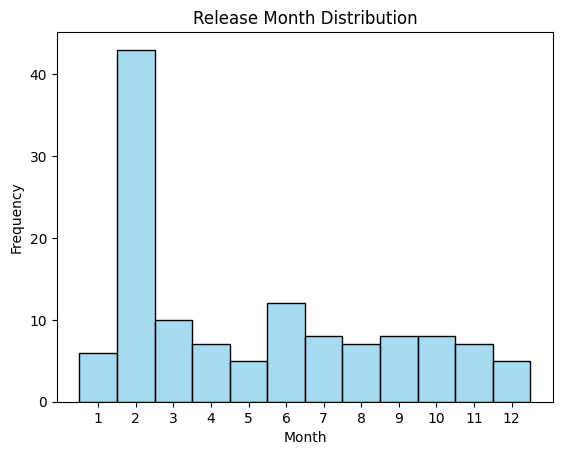

In [71]:
# 히스토그램 시각화
sns.histplot(identities_df['Release_Month'], kde=False, bins=12, discrete=True, color='skyblue')
plt.title('Release Month Distribution')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 13))  # 1부터 12까지 월 표시
plt.show()

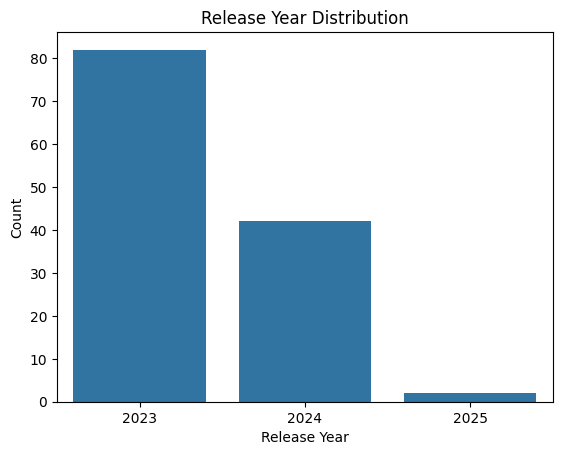

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Release_Year 값의 빈도 수를 구합니다.
release_year_counts = identities_df['Release_Year'].value_counts().sort_index()

# barplot으로 시각화
sns.barplot(x=release_year_counts.index.astype(str), y=release_year_counts.values)
plt.title('Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

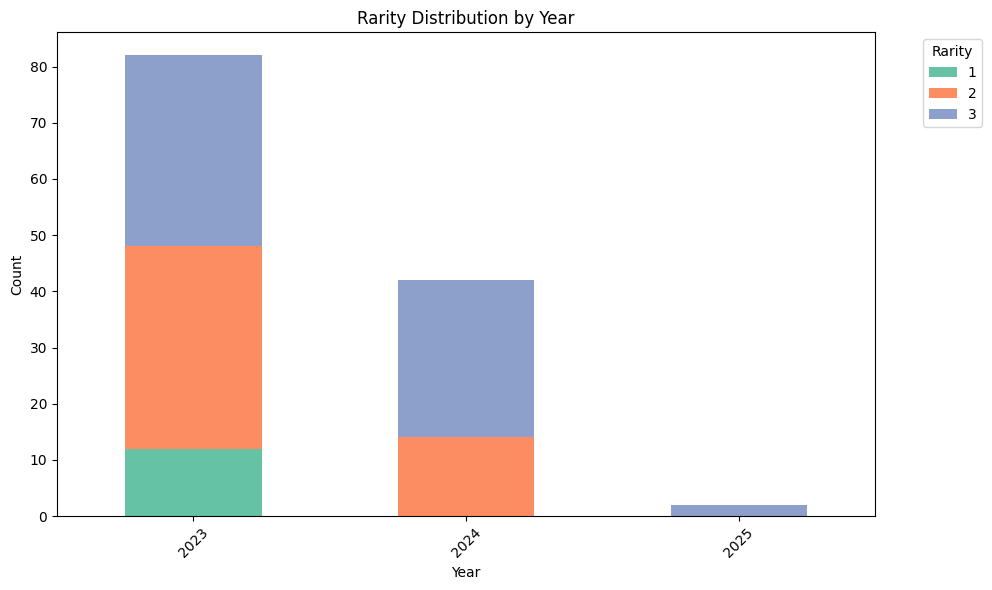

In [73]:
# 년도별로 rarity 분포 집계
rarity_yearly_distribution = identities_df.groupby(['Release_Year', 'Rarity']).size().unstack(fill_value=0)

# 시각화
rarity_yearly_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Set2", n_colors=len(rarity_yearly_distribution.columns)))
plt.title('Rarity Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Rarity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # 레이아웃 조정
plt.show()

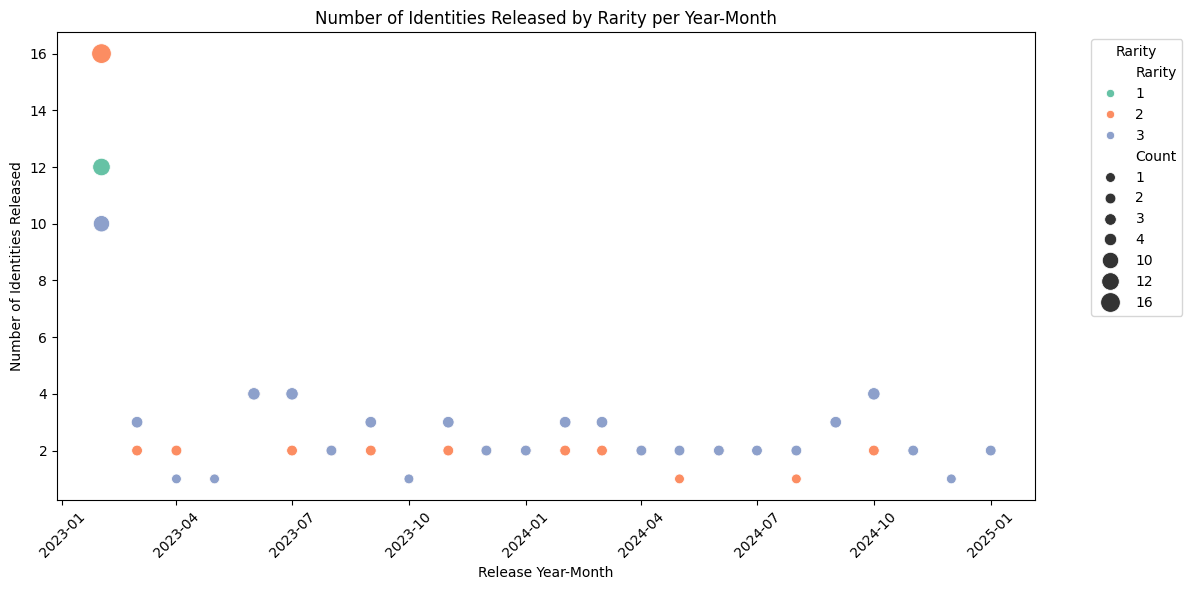

In [74]:
# 년-월 형식으로 새로운 컬럼 'Release_Year_Month' 생성 (datetime으로 변환)
identities_df['Release_Year_Month'] = identities_df['Release_Date'].dt.to_period('M').dt.to_timestamp()

# 년-월, Rarity별로 출시된 인격 수 계산
rarity_monthly_count = identities_df.groupby(['Release_Year_Month', 'Rarity']).size().reset_index(name='Count')

# 점 그래프 그리기
plt.figure(figsize=(12, 6))
ax = plt.gca()  # 현재 Axes 객체를 가져옵니다.
sns.scatterplot(data=rarity_monthly_count, x='Release_Year_Month', y='Count', hue='Rarity', size='Count', sizes=(50, 200), palette="Set2", legend='full', ax=ax)

plt.title('Number of Identities Released by Rarity per Year-Month')
plt.xlabel('Release Year-Month')
plt.ylabel('Number of Identities Released')
plt.xticks(rotation=45)
plt.legend(title='Rarity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [75]:
identities_df

,ID,Name,Rarity,Release_Date,Release_Month,Release_Year,Release_Day,Release_Year_Month
0,10101,[LCB Sinner] Yi Sang,1,2023-02-27,2,2023,27,2023-02-01
1,10102,[Seven Assoc. South Section 6] Yi Sang,2,2023-02-27,2,2023,27,2023-02-01
2,10103,[Blade Lineage Salsu] Yi Sang,3,2023-02-27,2,2023,27,2023-02-01
3,10104,[Effloresced E.G.O::Spicebush] Yi Sang,3,2023-06-15,6,2023,15,2023-06-01
4,10105,[Molar Office Fixer] Yi Sang,2,2023-09-14,9,2023,14,2023-09-01
...,...,...,...,...,...,...,...,...
121,11206,[Zwei Assoc. South Section 4] Gregor,3,2023-08-10,8,2023,10,2023-08-01
122,11207,[Twinhook Pirates First Mate] Gregor,3,2023-11-16,11,2023,16,2023-11-01
123,11208,[Kurokumo Clan Captain] Gregor,2,2024-02-22,2,2024,22,2024-02-01
124,11209,[Edgar Family Heir] Gregor,3,2024-04-04,4,2024,4,2024-04-01


In [76]:
identities_df = identities_df.drop(columns=['Release_Date','Release_Year_Month'])

In [77]:
identities_df

,ID,Name,Rarity,Release_Month,Release_Year,Release_Day
0,10101,[LCB Sinner] Yi Sang,1,2,2023,27
1,10102,[Seven Assoc. South Section 6] Yi Sang,2,2,2023,27
2,10103,[Blade Lineage Salsu] Yi Sang,3,2,2023,27
3,10104,[Effloresced E.G.O::Spicebush] Yi Sang,3,6,2023,15
4,10105,[Molar Office Fixer] Yi Sang,2,9,2023,14
...,...,...,...,...,...,...
121,11206,[Zwei Assoc. South Section 4] Gregor,3,8,2023,10
122,11207,[Twinhook Pirates First Mate] Gregor,3,11,2023,16
123,11208,[Kurokumo Clan Captain] Gregor,2,2,2024,22
124,11209,[Edgar Family Heir] Gregor,3,4,2024,4


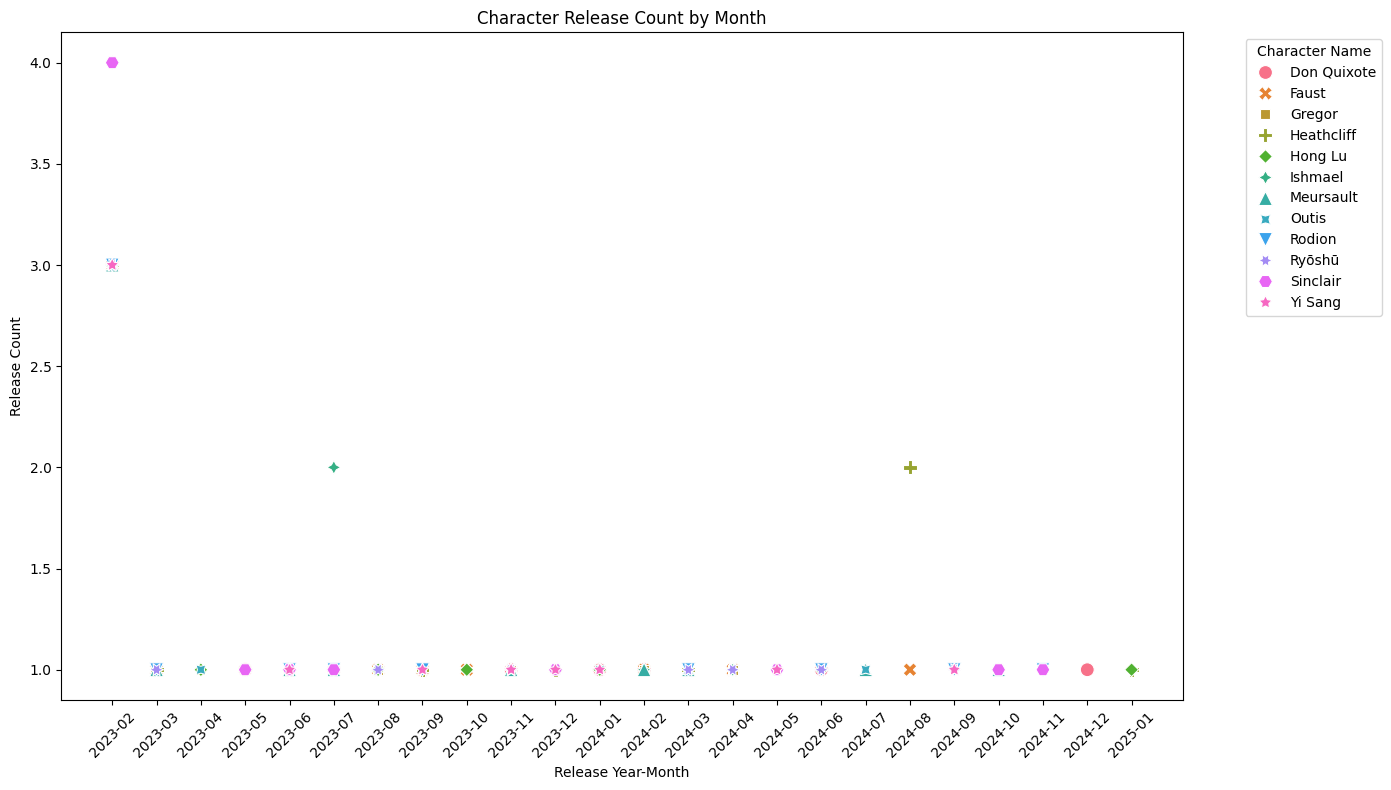

In [89]:
# 새로운 데이터프레임 생성
identities_type_df = identities_df.copy()

# 'Name' 컬럼에서 ']' 뒤에 있는 모든 문자 추출
identities_type_df['Character_Name'] = identities_type_df['Name'].apply(
    lambda x: re.search(r'\](.*)', x).group(1).strip() if re.search(r'\](.*)', x) else None
)

# 'Release_Year_Month' 컬럼 생성 (Release_Year + Release_Month)
identities_type_df['Release_Year_Month'] = identities_type_df['Release_Year'].astype(str) + '-' + identities_type_df['Release_Month'].astype(str).str.zfill(2)

# 3. 'Release_Year_Month'와 'Character_Name'별로 집계된 데이터프레임 생성
character_release_count = identities_type_df.groupby(['Release_Year_Month', 'Character_Name']).size().reset_index(name='Count')

# 4. 그래프 시각화
plt.figure(figsize=(14, 8))

# 각 캐릭터별로 시계열 점 그래프를 그립니다.
scatter_plot = sns.scatterplot(data=character_release_count, x='Release_Year_Month', y='Count', hue='Character_Name', style='Character_Name', markers=True, s=100)

# 제목과 축 설정
plt.title('Character Release Count by Month')
plt.xlabel('Release Year-Month')
plt.ylabel('Release Count')
plt.xticks(rotation=45)

# 범례 수동 설정
handles, labels = scatter_plot.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Character Name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# 그래프 출력
plt.show()


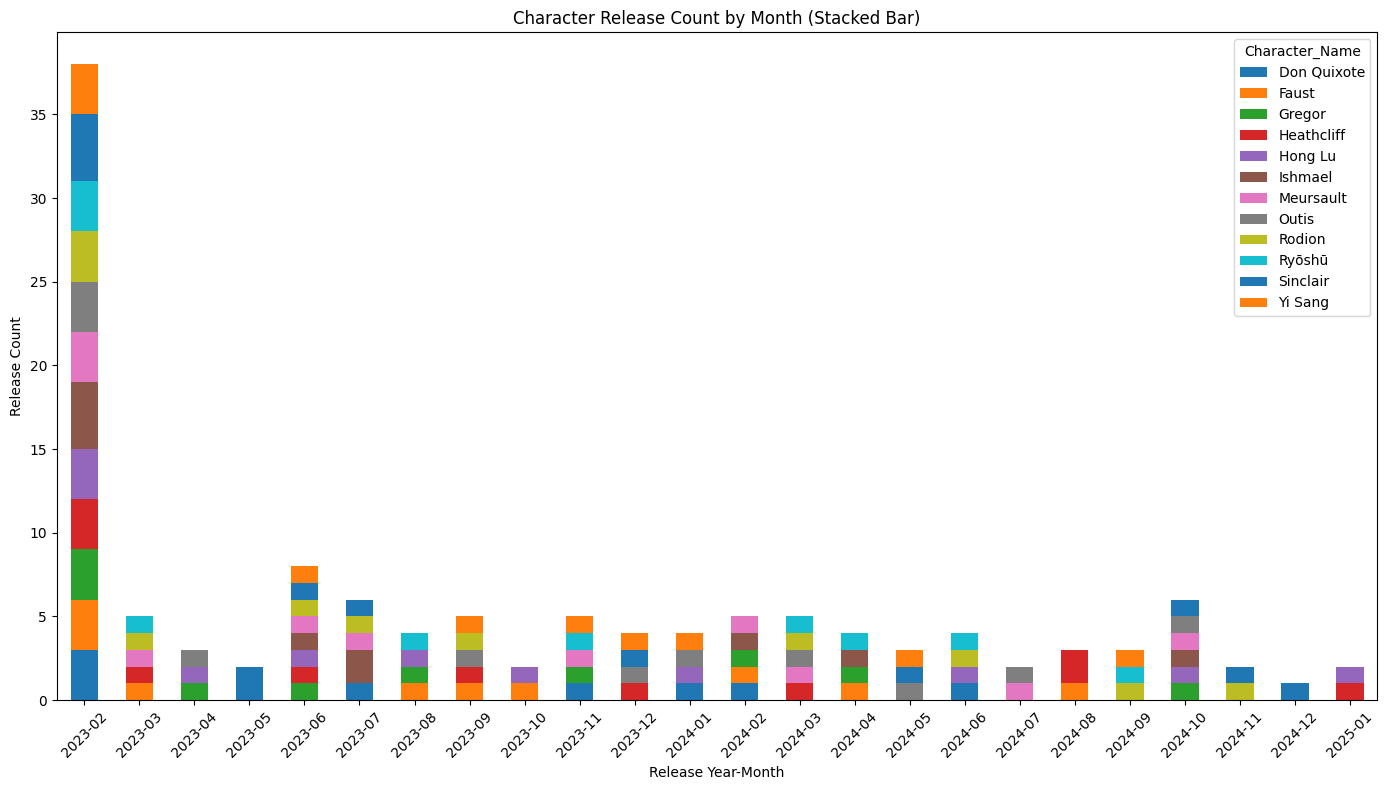

In [90]:
# 새로운 데이터프레임 생성
identities_type_df = identities_df.copy()

# 'Name' 컬럼에서 ']' 뒤에 있는 모든 문자 추출
identities_type_df['Character_Name'] = identities_type_df['Name'].apply(
    lambda x: re.search(r'\](.*)', x).group(1).strip() if re.search(r'\](.*)', x) else None
)

# 'Release_Year_Month' 컬럼 생성 (Release_Year + Release_Month)
identities_type_df['Release_Year_Month'] = identities_type_df['Release_Year'].astype(str) + '-' + identities_type_df['Release_Month'].astype(str).str.zfill(2)

# 3. 'Release_Year_Month'와 'Character_Name'별로 집계된 데이터프레임 생성
character_release_count = identities_type_df.groupby(['Release_Year_Month', 'Character_Name']).size().reset_index(name='Count')

# 4. 피벗 테이블을 사용하여 데이터 변환 (각 캐릭터별로 컬럼 생성)
pivot_df = character_release_count.pivot_table(index='Release_Year_Month', columns='Character_Name', values='Count', aggfunc='sum', fill_value=0)

# 5. 누적 막대 그래프 시각화
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8))

# 제목과 축 설정
plt.title('Character Release Count by Month (Stacked Bar)')
plt.xlabel('Release Year-Month')
plt.ylabel('Release Count')
plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()


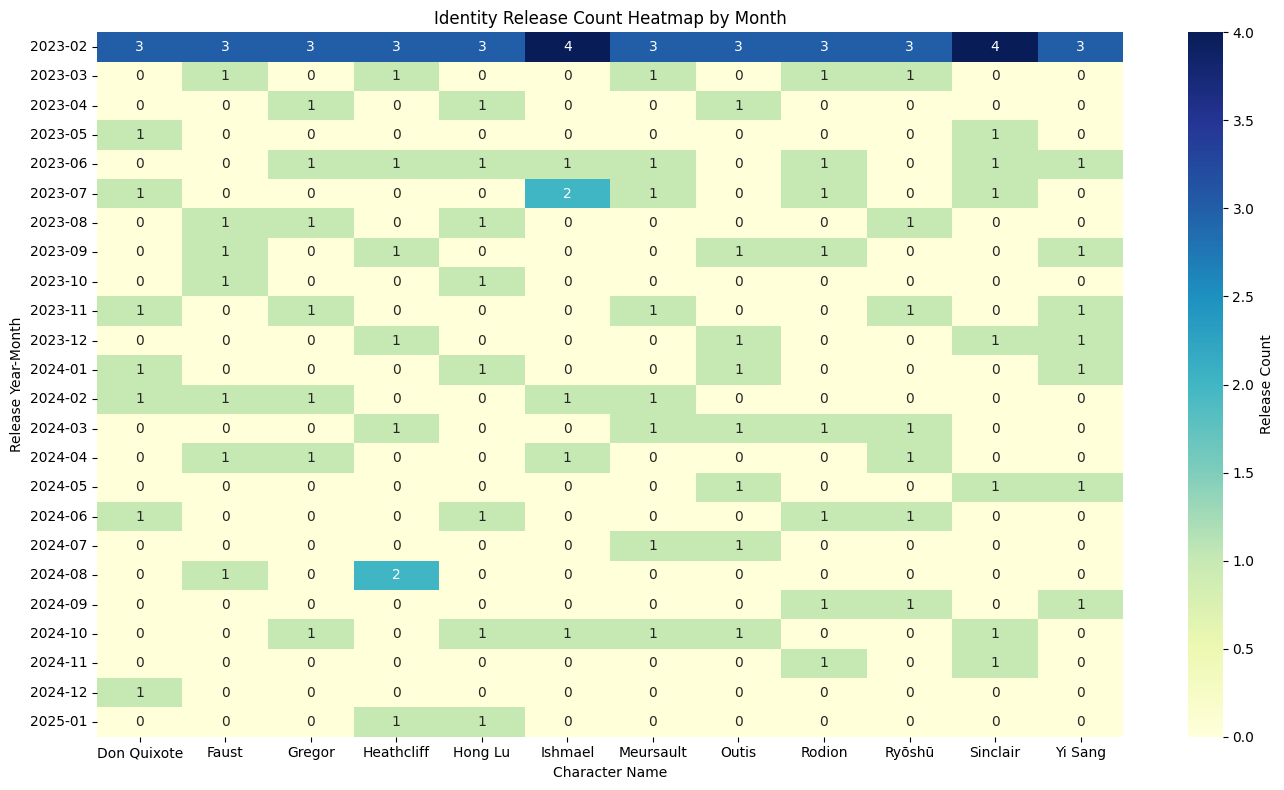

In [92]:
# 새로운 데이터프레임 생성
identities_type_df = identities_df.copy()

# 'Name' 컬럼에서 ']' 뒤에 있는 모든 문자 추출
identities_type_df['Character_Name'] = identities_type_df['Name'].apply(
    lambda x: re.search(r'\](.*)', x).group(1).strip() if re.search(r'\](.*)', x) else None
)

# 'Release_Year_Month' 컬럼 생성 (Release_Year + Release_Month)
identities_type_df['Release_Year_Month'] = identities_type_df['Release_Year'].astype(str) + '-' + identities_type_df['Release_Month'].astype(str).str.zfill(2)
 
# 3. 'Release_Year_Month'와 'Character_Name'별로 집계된 데이터프레임 생성
character_release_count = identities_type_df.groupby(['Release_Year_Month', 'Character_Name']).size().reset_index(name='Count')

# 4. 피벗 테이블을 사용하여 데이터 변환 (각 캐릭터별로 컬럼 생성)
pivot_df = character_release_count.pivot_table(index='Release_Year_Month', columns='Character_Name', values='Count', aggfunc='sum', fill_value=0)

# 5. 히트맵 시각화
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Release Count'})

# 제목과 축 설정
plt.title('Identity Release Count Heatmap by Month')
plt.xlabel('Character Name')
plt.ylabel('Release Year-Month')

# 그래프 출력
plt.tight_layout()
plt.show()


In [88]:
import re

# 'Name' 컬럼에서 ']' 뒤에 있는 첫 번째 단어 추출 (공백을 무시하고 단어 추출)
identities_type_df['Character_Name'] = identities_type_df['Name'].apply(
    lambda x: re.search(r'\](.*)', x).group(1) if re.search(r'\](.*)', x) else None
)

# 결과 확인
identities_type_df[['Name', 'Character_Name']].head(10)


,Name,Character_Name
0,[LCB Sinner] Yi Sang,Yi Sang
1,[Seven Assoc. South Section 6] Yi Sang,Yi Sang
2,[Blade Lineage Salsu] Yi Sang,Yi Sang
3,[Effloresced E.G.O::Spicebush] Yi Sang,Yi Sang
4,[Molar Office Fixer] Yi Sang,Yi Sang
5,[W Corp. L3 Cleanup Agent] Yi Sang,Yi Sang
6,[The Pequod First Mate] Yi Sang,Yi Sang
7,[Dieci Assoc. South Section 4] Yi Sang,Yi Sang
8,[The Ring Pointillist Student] Yi Sang,Yi Sang
9,[Lobotomy E.G.O::Solemn Lament] Yi Sang,Yi Sang


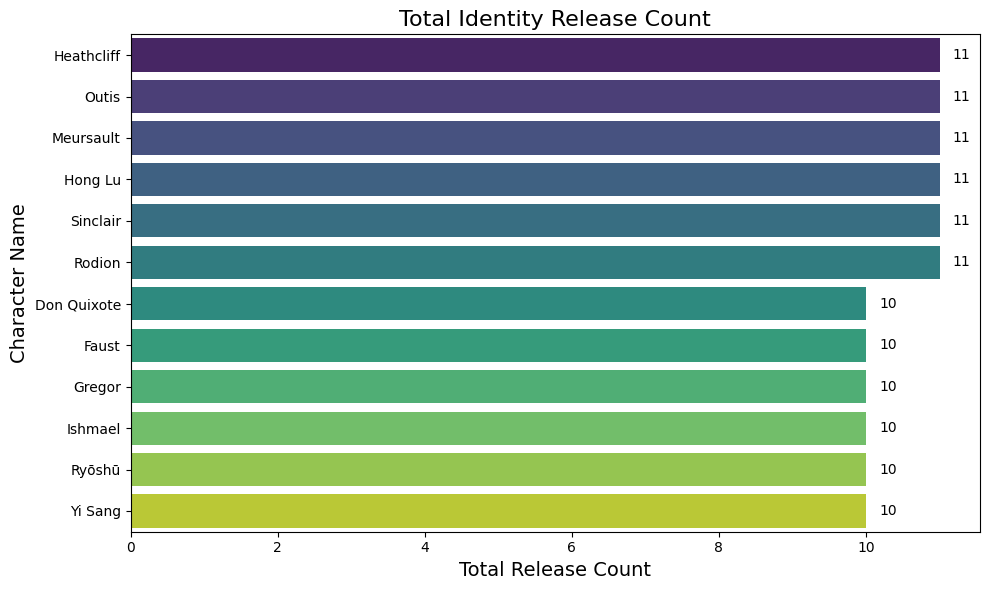

In [129]:
# 새로운 데이터프레임 생성
identities_type_df = identities_df.copy()

# 'Name' 컬럼에서 ']' 뒤에 있는 모든 문자 추출
identities_type_df['Character_Name'] = identities_type_df['Name'].apply(
    lambda x: re.search(r'\](.*)', x).group(1).strip() if re.search(r'\](.*)', x) else None
)

# 1. 'Character_Name'별로 출시 횟수 집계
character_total_release = identities_type_df.groupby('Character_Name').size().reset_index(name='Total_Count')

# 2. 출시 횟수를 내림차순으로 정렬
character_total_release = character_total_release.sort_values(by='Total_Count', ascending=False)

# 3. 막대 그래프 시각화
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Total_Count', y='Character_Name', data=character_total_release, hue='Character_Name', palette='viridis')

# x축 끝에 텍스트 추가
max_value = df['Total_count'].max()  # x축 최대 값
for i, p in enumerate(ax.patches):
    ax.text(p.get_width() + .3 , p.get_y() + p.get_height() / 2,
            f'{p.get_width():,.0f}',  # p.get_width()는 막대의 값입니다
            ha='center', va='center', color='black')

# 제목과 축 설정
plt.title('Total Identity Release Count', fontsize=16)
plt.xlabel('Total Release Count', fontsize=14)
plt.ylabel('Character Name', fontsize=14)


# 그래프 출력
plt.tight_layout()
plt.show()

In [130]:
identities_type_df

,ID,Name,Rarity,Release_Month,Release_Year,Release_Day,Character_Name,Release_Year_Month
0,10101,[LCB Sinner] Yi Sang,1,2,2023,27,Yi Sang,2023-02
1,10102,[Seven Assoc. South Section 6] Yi Sang,2,2,2023,27,Yi Sang,2023-02
2,10103,[Blade Lineage Salsu] Yi Sang,3,2,2023,27,Yi Sang,2023-02
3,10104,[Effloresced E.G.O::Spicebush] Yi Sang,3,6,2023,15,Yi Sang,2023-06
4,10105,[Molar Office Fixer] Yi Sang,2,9,2023,14,Yi Sang,2023-09
...,...,...,...,...,...,...,...,...
121,11206,[Zwei Assoc. South Section 4] Gregor,3,8,2023,10,Gregor,2023-08
122,11207,[Twinhook Pirates First Mate] Gregor,3,11,2023,16,Gregor,2023-11
123,11208,[Kurokumo Clan Captain] Gregor,2,2,2024,22,Gregor,2024-02
124,11209,[Edgar Family Heir] Gregor,3,4,2024,4,Gregor,2024-04
